In [10]:
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv('data/noblance/GAN&Real.csv', low_memory=False)

In [11]:
def filter(f):
    columns = ['protein', 'diagnosis', 'multiclassification', 'folder', 'subfolder', 'binaryclassification', 'class', 'concentration', 'isreal']
    x = ds[ds['diagnosis']==f]
    x = x.drop(columns, axis = 1)
    # x = x.iloc[:, 5:]
    return x.mean()

In [12]:
diagnosis = ['Blank', 'Streptavidin', 'VLP', 'S', 'N']
diagnosisy = ['N protein', 'S protein', 'VLP', 'Streptavidin', 'Blank signal']
colors = ['#e73f74', '#3969ac', '#f2b701', '#80ba5a', '#11a579']

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/bz/v1p77tsn4hbdl4zgynxf9wpm0000gn/T/ipykernel_3397/1799079865.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Wavenumber ($\mathregular{cm^{-1}})$")
/var/folders/bz/v1p77tsn4hbdl4zgynxf9wpm0000gn/T/ipykernel_3397/1799079865.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(diagnosisy,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


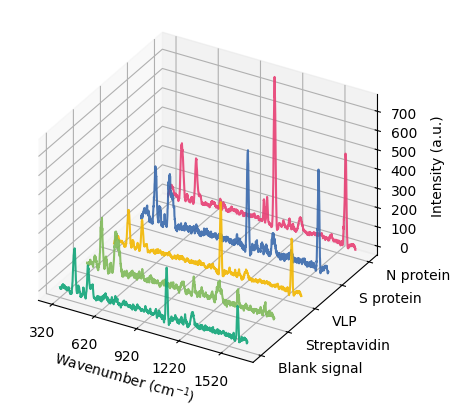

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection='3d')
yticks = [4,3,2,1,0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    # cs = [c] * len(xs)
    # cs[0] = 'c'
    x = filter(diagnosis[k])
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.plot(range(320,1651), x.values, zs=k, zdir='y', alpha=0.9, color=c)

ax.set_zlabel('Intensity (a.u.)', labelpad=5)

x_ticks = np.arange(320, 1651, 300)  # Generate x-ticks with step 200
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)  # Set the labels to the ticks
ax.set_xlabel("Wavenumber ($\mathregular{cm^{-1}})$")
# ax.set_zlabel('Intensity (a.u.)')
ax.set_yticklabels(diagnosisy,
                   verticalalignment='baseline',
                   horizontalalignment='left')
# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
ax.set_proj_type('ortho')
plt.savefig('diagram/spectrum_real.eps', bbox_inches='tight')
plt.show()